In [199]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plty
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.feature_selection import f_classif
import xgboost as xgb
import warnings 
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer

In [200]:
df=pd.read_csv(r"C:\Users\USER\Downloads\diabetes (4).csv")

In [201]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [202]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [203]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [204]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
10           139      80             0              0        27.1  1.441                     57   0          1
             148      84             48             237      37.6  1.001                     51   1          1
             161      68             23             132      25.5  0.326                     47   1          1
             162      84             0              0        27.7  0.182                     54   0          1
             168      74             0              0        38.0  0.537                     34   1          1
                                                                                                            ..
0            74       52             10             36       27.8  0.269                     22   0          1
             78       88             29             40       36.9  0.434                     21   0          1
      

In [205]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [206]:
df["Pregnancies"].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64

In [207]:
df["BloodPressure"].value_counts()

BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
85      6
94      6
48      5
44      4
96      4
110     3
106     3
100     3
98      3
30      2
46      2
55      2
104     2
108     2
40      1
122     1
95      1
102     1
61      1
24      1
38      1
114     1
Name: count, dtype: int64

In [208]:
df["Glucose"].value_counts()

Glucose
99     17
100    17
111    14
125    14
129    14
       ..
56      1
169     1
149     1
65      1
190     1
Name: count, Length: 136, dtype: int64

In [209]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [210]:
df["SkinThickness"].value_counts()

SkinThickness
0     227
32     31
30     27
27     23
23     22
18     20
33     20
28     20
31     19
39     18
19     18
29     17
25     16
40     16
22     16
37     16
26     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
16      6
11      6
45      6
14      6
43      6
44      5
10      5
47      4
48      4
49      3
50      3
54      2
8       2
52      2
7       2
60      1
51      1
56      1
63      1
99      1
Name: count, dtype: int64

In [211]:
df["Insulin"].value_counts()

Insulin
0      374
105     11
130      9
140      9
120      8
      ... 
178      1
127      1
510      1
16       1
112      1
Name: count, Length: 186, dtype: int64

In [212]:
df["BMI"].value_counts()

BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
49.6     1
24.1     1
41.2     1
49.3     1
46.3     1
Name: count, Length: 248, dtype: int64

In [213]:
df["DiabetesPedigreeFunction"].value_counts()

DiabetesPedigreeFunction
0.258    6
0.254    6
0.268    5
0.259    5
0.261    5
        ..
1.182    1
0.222    1
1.057    1
0.766    1
0.393    1
Name: count, Length: 517, dtype: int64

In [214]:
df["Age"].value_counts()

Age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
36    16
38    16
32    16
45    15
34    14
46    13
40    13
43    13
39    12
35    10
44     8
50     8
51     8
52     8
58     7
54     6
47     6
49     5
60     5
53     5
57     5
48     5
63     4
66     4
55     4
62     4
59     3
56     3
65     3
67     3
61     2
69     2
72     1
81     1
64     1
70     1
68     1
Name: count, dtype: int64

In [215]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [216]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
10           139      80             0              0        27.1  1.441                     57   0          1
             148      84             48             237      37.6  1.001                     51   1          1
             161      68             23             132      25.5  0.326                     47   1          1
             162      84             0              0        27.7  0.182                     54   0          1
             168      74             0              0        38.0  0.537                     34   1          1
                                                                                                            ..
0            74       52             10             36       27.8  0.269                     22   0          1
             78       88             29             40       36.9  0.434                     21   0          1
      

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [218]:
df.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [219]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [220]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [221]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [222]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [223]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [224]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [225]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [226]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [227]:
df.duplicated().sum()

np.int64(0)

<Axes: >

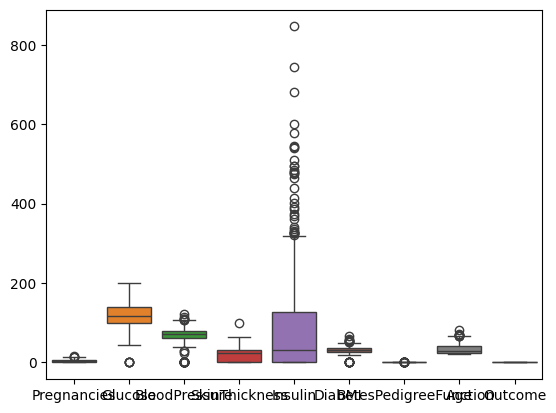

In [228]:
sns.boxplot(df)

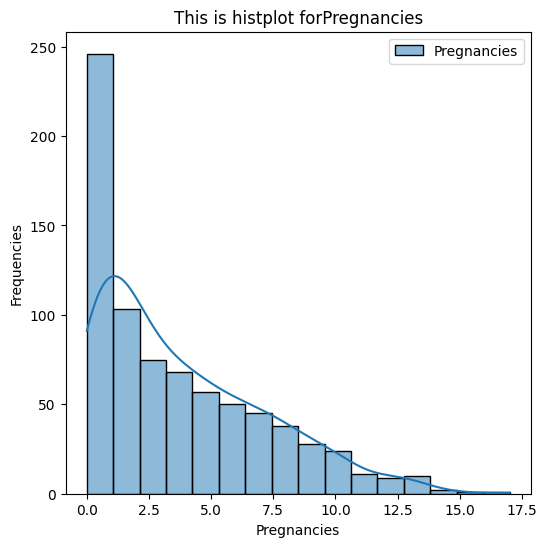

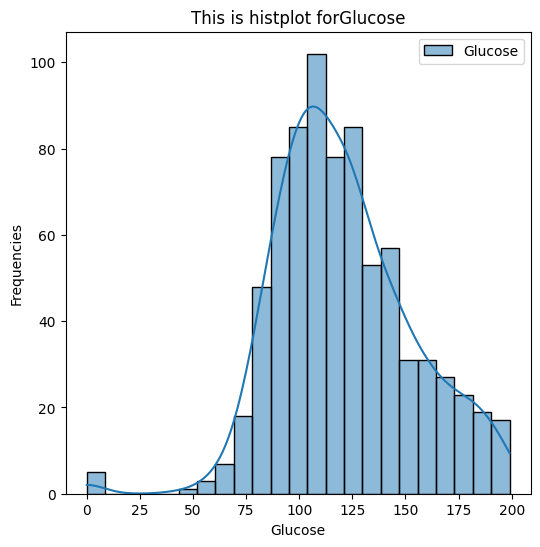

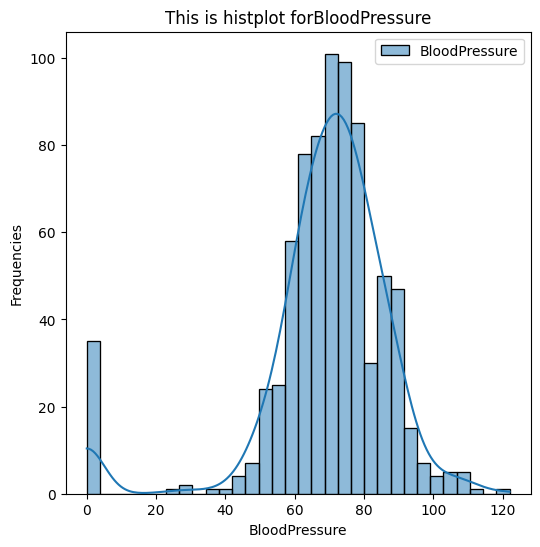

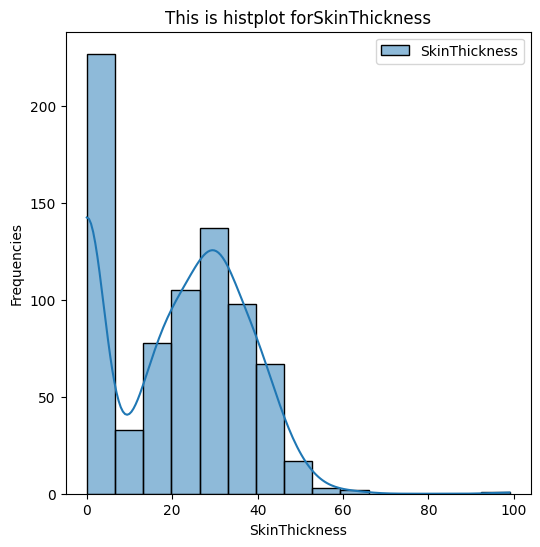

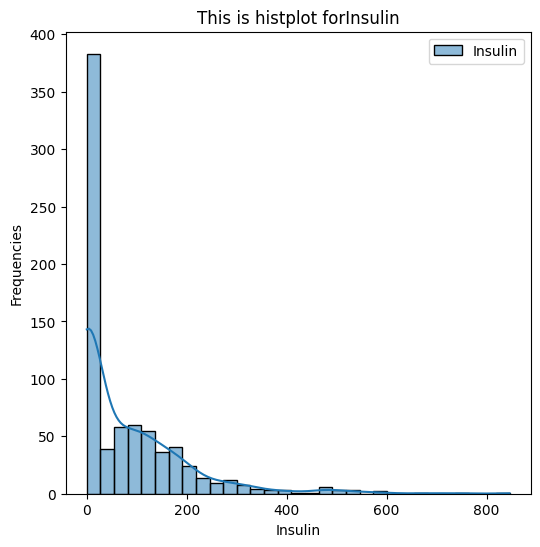

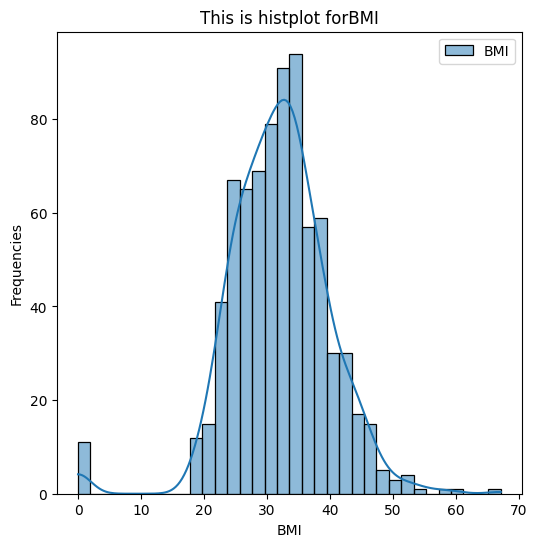

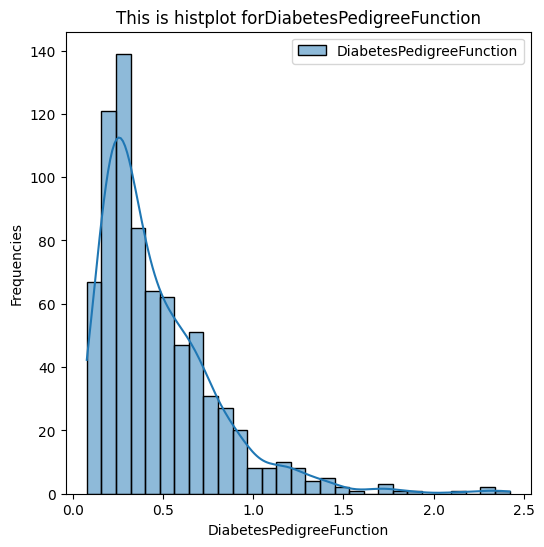

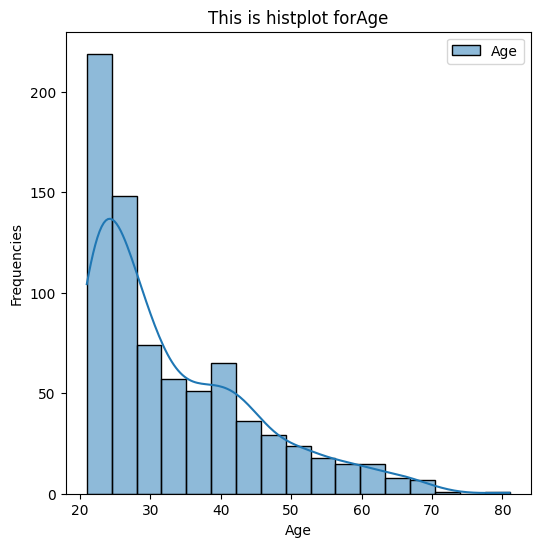

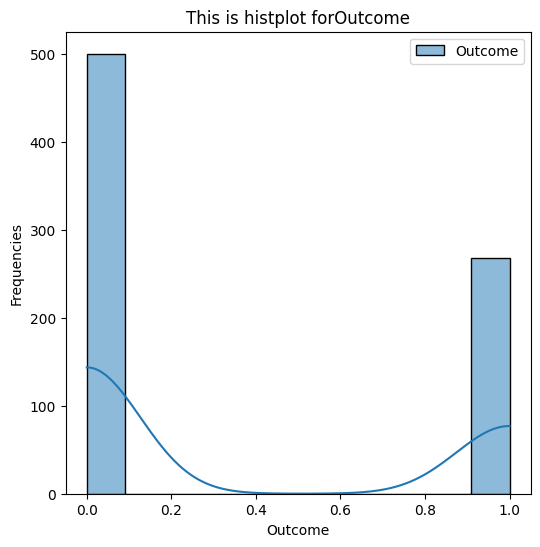

In [229]:
numss=[i for i in df.columns if df[i].dtypes!="O"]
df[numss]
for col in df[numss]:
    plt.figure(figsize=(6,6))
    sns.histplot(df[col],kde=True,label=col)
    plt.xlabel(col)
    plt.ylabel("Frequencies")
    plt.title(f"This is histplot for{col}")
    plt.legend()
    plt.show()

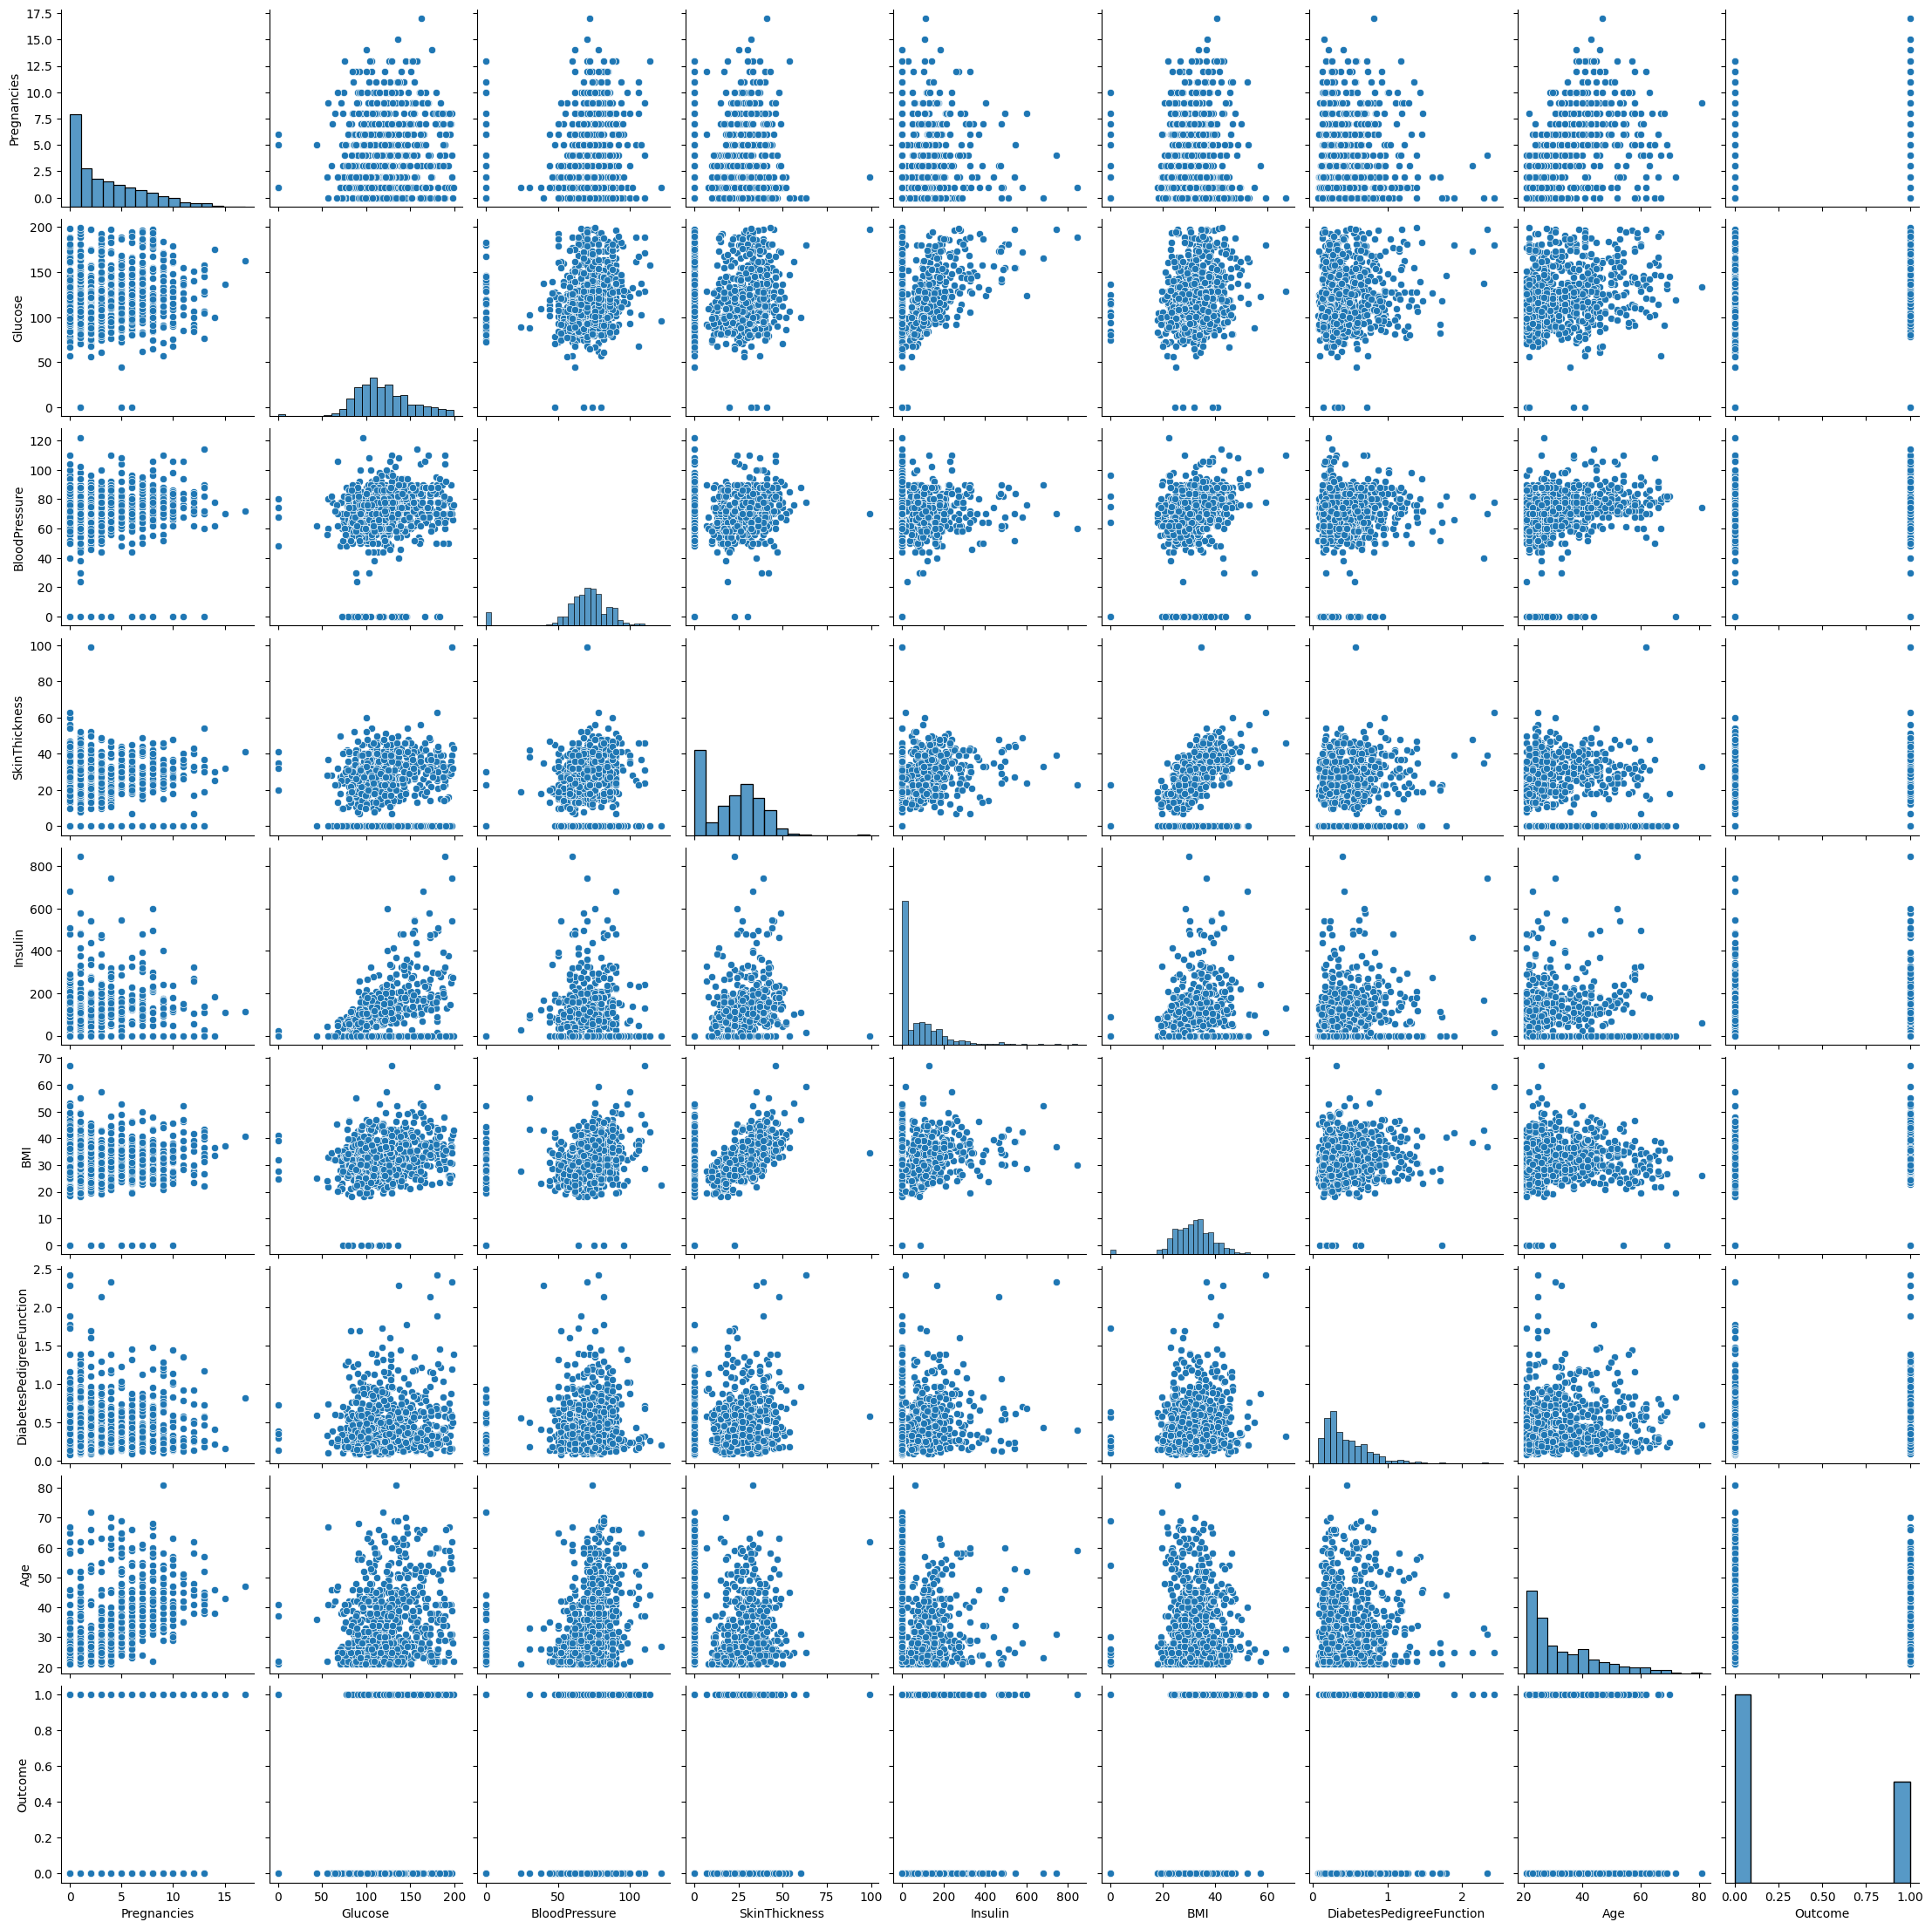

In [230]:
sns.pairplot(df)

In [231]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: xlabel='BloodPressure', ylabel='Insulin'>

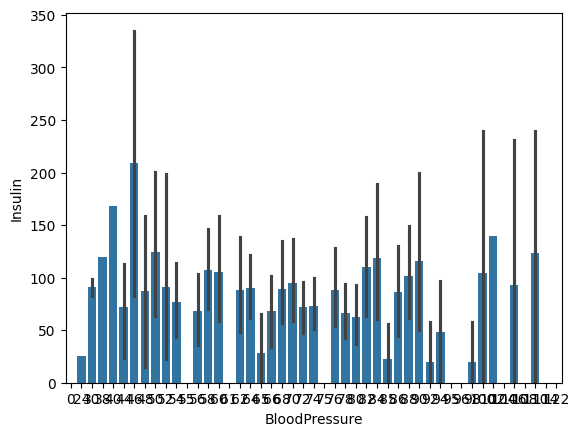

In [232]:
sns.barplot(x="BloodPressure",y="Insulin",data=df) 

In [233]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: xlabel='Age', ylabel='DiabetesPedigreeFunction'>

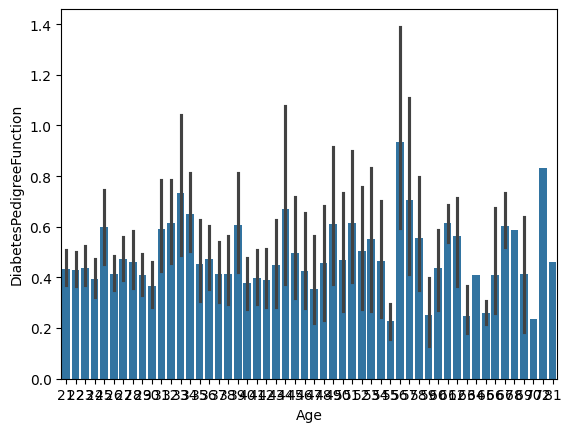

In [234]:
sns.barplot(x="Age",y="DiabetesPedigreeFunction",data=df) 

<Axes: xlabel='Glucose', ylabel='BloodPressure'>

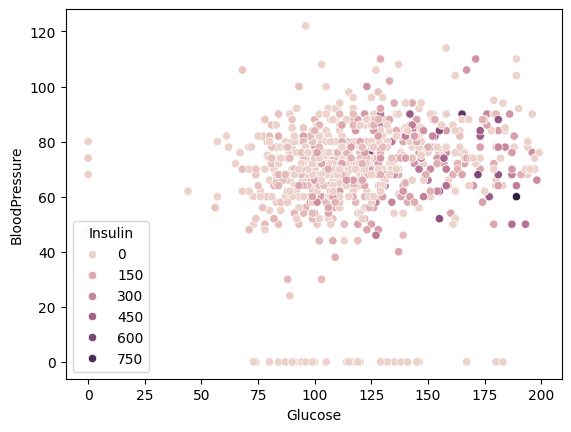

In [235]:
sns.scatterplot(x="Glucose",y="BloodPressure",hue="Insulin",data=df) 

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

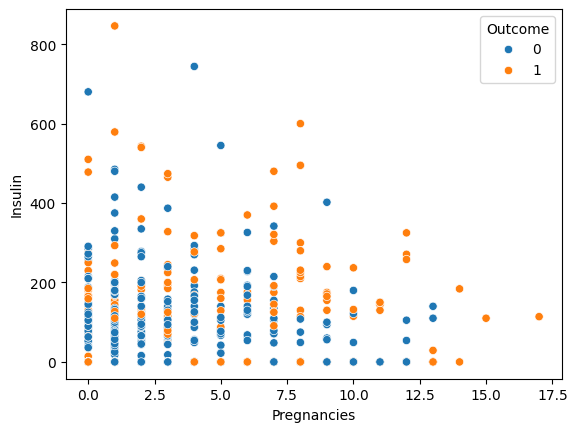

In [236]:
sns.scatterplot(x="Pregnancies",y="Insulin",hue="Outcome",data=df)

<Axes: xlabel='SkinThickness', ylabel='BloodPressure'>

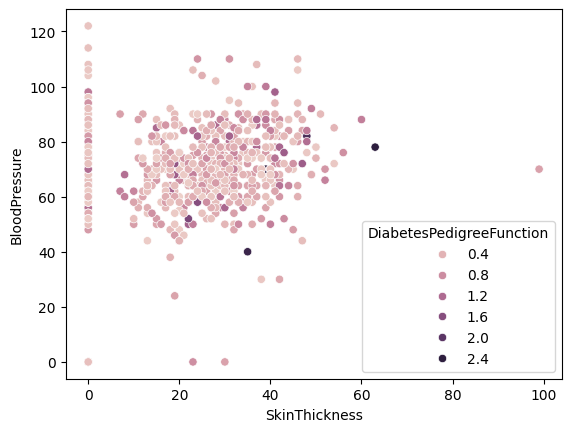

In [237]:
sns.scatterplot(x="SkinThickness",y="BloodPressure",hue="DiabetesPedigreeFunction",data=df) 

<Axes: xlabel='SkinThickness', ylabel='Insulin'>

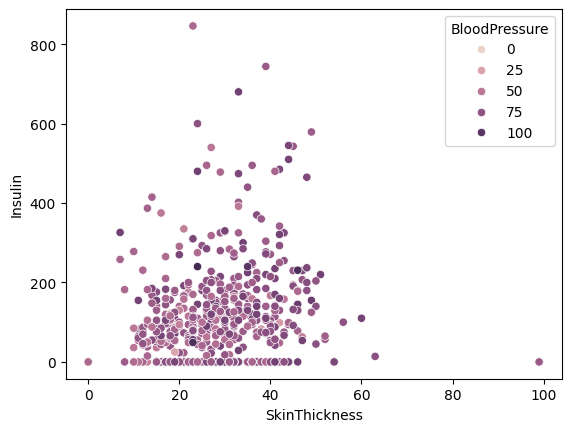

In [238]:
sns.scatterplot(x="SkinThickness",y="Insulin",hue="BloodPressure",data=df) 

<Axes: xlabel='SkinThickness', ylabel='Insulin'>

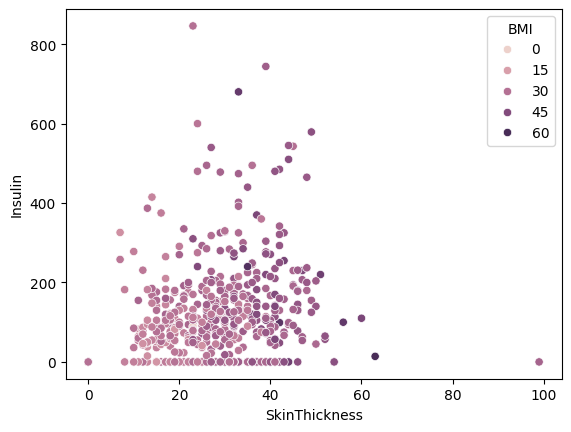

In [239]:
sns.scatterplot(x="SkinThickness",y="Insulin",hue="BMI",data=df) 

<Axes: xlabel='Age', ylabel='Insulin'>

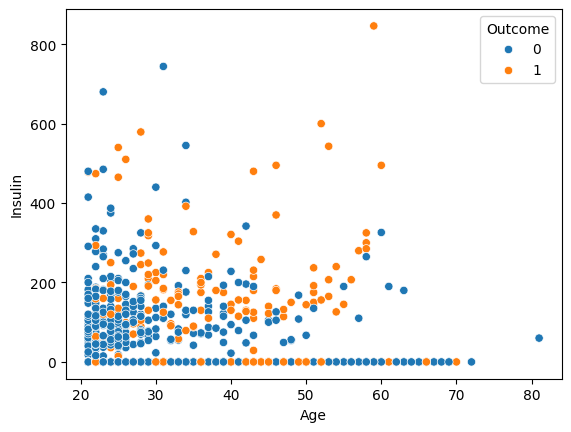

In [240]:
sns.scatterplot(x="Age",y="Insulin",hue="Outcome",data=df) 

<Axes: >

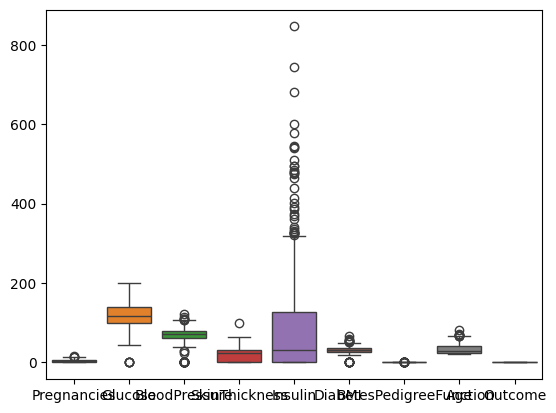

In [241]:
sns.boxplot(df)

In [242]:
def outlier_capping(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower_extream=q1-1.5*iqr
    upper_extream=q3+1.5*iqr
    df[column]=df[column].apply(lambda x:lower_extream if x<lower_extream else upper_extream if x>upper_extream else x)
for col in df.select_dtypes(["int","float"]).columns:
    outlier_capping(df,col)

<Axes: >

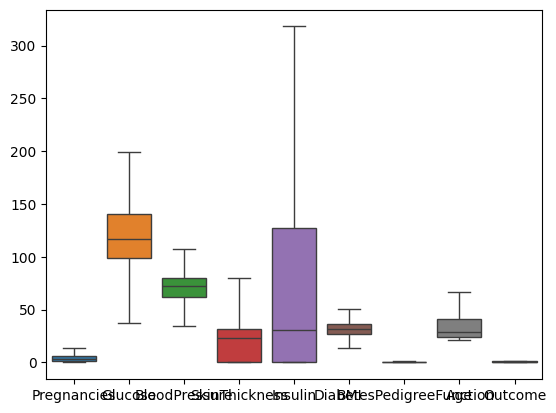

In [243]:
sns.boxplot(df)

In [244]:
cat_cols=[i for i in df.columns if df[i].dtypes=="O"]

In [245]:
cat_cols

[]

In [246]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


In [247]:
targets=df[["Outcome"]]

In [248]:
features=df.drop(columns="Outcome")

In [249]:
features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [250]:
targets

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


<Axes: >

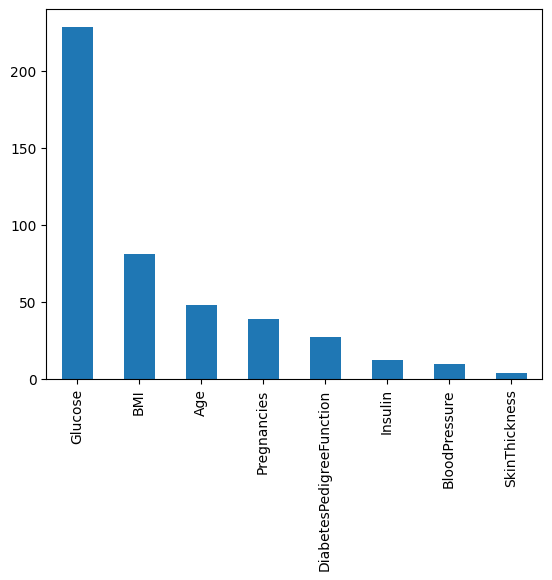

In [251]:
f_class=f_classif(features,targets)
pd.Series(f_class[0],index=features.columns).sort_values(ascending=False).plot(kind="bar")

In [252]:
features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [253]:
scalers=StandardScaler()

In [254]:
featuress =pd.DataFrame(scalers.fit_transform(features,targets),columns=features.columns)

In [255]:
featuress

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.647150,0.861926,0.092691,0.914986,-0.787602,0.209359,0.588927,1.445691
1,-0.848970,-1.159433,-0.330201,0.536065,-0.787602,-0.784254,-0.378101,-0.189304
2,1.245598,1.984903,-0.471166,-1.295388,-0.787602,-1.252672,0.746595,-0.103252
3,-0.848970,-1.031093,-0.330201,0.157144,0.217583,-0.571337,-1.022787,-1.049828
4,-1.148194,0.508990,-2.162737,0.914986,1.008900,1.557835,2.596563,-0.017199
...,...,...,...,...,...,...,...,...
763,1.844045,-0.646072,0.374620,1.735982,1.137221,0.109998,-1.008772,2.564372
764,-0.549746,0.027714,-0.048273,0.409758,-0.787602,0.663583,-0.416642,-0.533513
765,0.347926,-0.004371,0.092691,0.157144,0.410066,-0.841032,-0.749497,-0.275356
766,-0.848970,0.156054,-0.753094,-1.295388,-0.787602,-0.287447,-0.385109,1.187534


In [309]:
x_train,x_test,y_train,y_test=train_test_split(featuress,targets,test_size=0.2,random_state=42)

In [310]:
print(features.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(768, 8)
(614, 8)
(154, 8)
(614, 1)
(154, 1)


In [311]:
x_train=scalers.fit_transform(x_train)
x_test=scalers.fit_transform(x_test)

XGBOOSTS

In [312]:
from imblearn.over_sampling import SMOTE

In [313]:
smote=SMOTE(random_state=42)

In [314]:
x_train_res,y_train_res=smote.fit_resample(x_train,y_train)
x_train,x_test,y_train,y_test=train_test_split(x_train_res,y_train_res,test_size=0.2,random_state=42)

In [315]:
import xgboost as xgb

In [316]:
from xgboost import XGBClassifier

In [317]:
xgb_model = xgb.XGBClassifier( n_estimators=200,max_depth=6,min_child_weight=1,learning_rate=0.1,subsample=1.0,max_features=1,colsample_bytree=0.8,random_state=50,use_label_encoder=False,eval_metric='logloss',reg_lamda=1,reg_alpha=1)

In [318]:
xgb=xgb_model.fit(x_train_res,y_train_res)

In [319]:
y_preds=xgb.predict(x_test)

In [320]:
accuracy_score(y_test,y_preds)

1.0

In [321]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        82

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



In [322]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold

In [323]:
from sklearn.metrics import roc_auc_score
from scipy import stats

In [324]:
param_grid = {
    'n_estimators': [150,200 ],
    'max_depth': [4, 6],
    'learning_rate': [0.1, 0.2],
    'min_child_weight': [1, 2],
    'colsample_bytree': [0.6, 0.8]
}


Gridsearch hyperparameter tunings

In [325]:
grids=GridSearchCV(estimator=xgb,param_grid=param_grid,cv=3)

In [326]:
grids

,estimator,"XGBClassifier...obs=None, ...)"
,param_grid,"{'colsample_bytree': [0.6, 0.8], 'learning_rate': [0.1, 0.2], 'max_depth': [4, 6], 'min_child_weight': [1, 2], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [327]:
grids.fit(x_train_res,y_train_res)                                                   

,estimator,"XGBClassifier...obs=None, ...)"
,param_grid,"{'colsample_bytree': [0.6, 0.8], 'learning_rate': [0.1, 0.2], 'max_depth': [4, 6], 'min_child_weight': [1, 2], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [386]:
grids.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.2,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 150}

In [387]:
import xgboost as xgb

In [388]:
from xgboost import XGBClassifier

In [389]:
xgb_model = xgb.XGBClassifier( n_estimators=150,max_depth=4,min_child_weight=0,learning_rate=0.2,subsample=1.0,max_features=1,colsample_bytree=0.8,random_state=50,use_label_encoder=False,eval_metric='logloss')

In [390]:
xgb=xgb_model.fit(x_train_res,y_train_res)

In [391]:
y_preds=xgb.predict(x_test)

In [392]:
accuracy_score(y_test,y_preds)

1.0

In [394]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        82

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



LGBOOSTS

In [336]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [337]:
from lightgbm import LGBMClassifier

In [338]:
lgbms = LGBMClassifier(objective='binary',learning_rate=0.05,n_estimators=1000,num_leaves=31, max_depth=6,min_child_samples=40, feature_fraction=0.8,bagging_fraction=0.8,bagging_freq=5,reg_alpha=0.1,reg_lambda=0.1,random_state=42,verbosity=-1)
lgbms.fit(x_train_res, y_train_res) 
y_pred = lgbms.predict(x_test)

In [339]:
y_pred_labels = lgbms.predict(x_test) 

In [340]:
y_pred_proba = lgbms.predict_proba(x_test)

In [341]:
from sklearn.metrics import accuracy_score, classification_report

In [342]:
print(accuracy_score(y_test, y_pred))

1.0


In [343]:
print("Accuracy:", classification_report(y_test, y_pred))

Accuracy:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        82

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



Randomized search hyperparameter tunings

In [354]:
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [15, 31, 50],
    'max_depth': [4, 6, 8],
    'min_data_in_leaf': [10, 20, 40],
    'feature_fraction': [0.6, 0.8, 1.0],
    'bagging_fraction': [0.6, 0.8, 1.0],
    'bagging_freq': [0, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1]
}

In [355]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [356]:
rs = RandomizedSearchCV(estimator=lgbms,param_distributions=param_dist,n_iter=30,scoring='accuracy',cv=cv,random_state=42,n_jobs=-1)

In [357]:
rs.fit(x_train_res, y_train_res)

,estimator,LGBMClassifie... verbosity=-1)
,param_distributions,"{'bagging_fraction': [0.6, 0.8, ...], 'bagging_freq': [0, 5], 'feature_fraction': [0.6, 0.8, ...], 'learning_rate': [0.01, 0.05, ...], ...}"
,n_iter,30
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [358]:
rs.best_params_

{'reg_lambda': 0,
 'reg_alpha': 1,
 'num_leaves': 50,
 'min_data_in_leaf': 40,
 'max_depth': 4,
 'learning_rate': 0.1,
 'feature_fraction': 1.0,
 'bagging_freq': 0,
 'bagging_fraction': 0.8}

In [359]:
best_model = rs.best_estimator_

In [360]:
y_pred = best_model.predict(x_test)

In [361]:
print(accuracy_score(y_test, y_pred))

0.9937888198757764


In [362]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        79
           1       1.00      0.99      0.99        82

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161

